# DBSCAN

In [ ]:
from google.colab import drive # Подключаем google disk
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stajirovka/group4/clean_data.csv', index_col=False)

In [ ]:
df.head()

,file_name,btl,btr,bbr,bbl,obj_0,obj_1,obj_2
0,1127,0.311414,0.509305,0.198511,0.378412,1,0,0
1,4372,0.270681,0.440998,0.096107,0.324818,1,0,0
2,4372,0.435523,0.441606,0.138686,0.379562,1,0,0
3,3407,0.533774,0.536344,0.220264,0.486784,1,0,0
4,7548,0.560204,0.486888,0.188265,0.429286,1,0,0


In [ ]:
df_obj_0 = df[(df.obj_0 == 1)]

In [ ]:
df_obj_0.head(20)

,file_name,btl,btr,bbr,bbl,obj_0,obj_1,obj_2,Cluster
0,1127,0.311414,0.509305,0.198511,0.378412,1,0,0,-1.0
1,4372,0.270681,0.440998,0.096107,0.324818,1,0,0,0.0
2,4372,0.435523,0.441606,0.138686,0.379562,1,0,0,0.0
3,3407,0.533774,0.536344,0.220264,0.486784,1,0,0,-1.0
4,7548,0.560204,0.486888,0.188265,0.429286,1,0,0,-1.0
7,5923,0.400398,0.388446,0.111554,0.314741,1,0,0,2.0
8,3459,0.465605,0.428025,0.155414,0.412739,1,0,0,2.0
9,7029,0.460074,0.483415,0.180590,0.450860,1,0,0,2.0
10,7029,0.585381,0.493243,0.111794,0.426290,1,0,0,-1.0
11,7029,0.855651,0.616708,0.256757,0.321867,1,0,0,3.0


In [ ]:
x = df_obj_0.loc[:, ['file_name', 'btl', 'btr', 'bbr', 'bbl']].values

## kNN

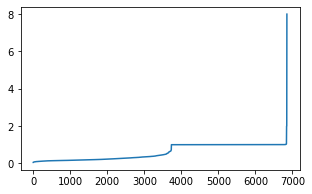

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x)
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show()

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=4)
clusters = dbscan.fit(x)

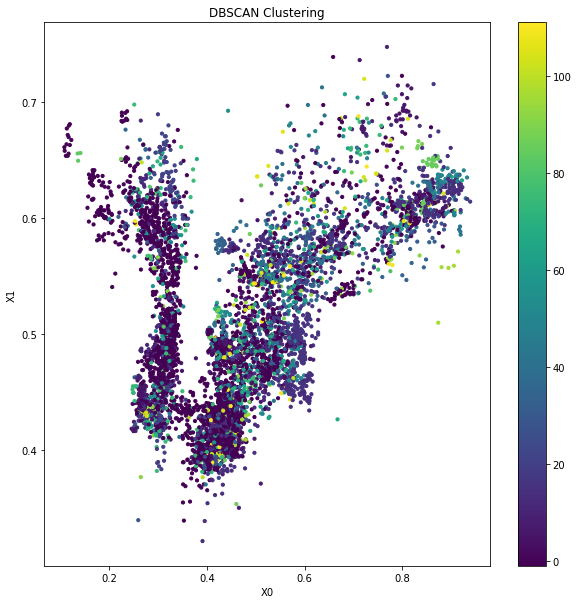

In [ ]:
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(x[:, 1], x[:,2], c = clusters.labels_,s=10)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

In [ ]:
clusters = pd.DataFrame(clusters.fit_predict(x))
df_obj_0["Cluster"] = clusters

<ipython-input-135-e8ddd3c3cb92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj_0["Cluster"] = clusters
